In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

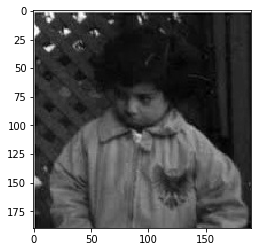

In [2]:
img = cv2.imread('pout.tif', cv2.IMREAD_GRAYSCALE)
img = img[:190, :190]
plt.imshow(img, cmap = 'gray')

## Discrete Fourier Transform

In [3]:
def generateDFTmatrix(N):
    arr = []
    for i in range(N):
        temp = []
        for j in range(N):
            val = np.exp(-2j * np.pi * j * i / N)
            temp.append(val)
            
        arr.append(np.array(temp))
        
    return np.array(arr)

In [4]:
A = generateDFTmatrix(190)

#### DFT

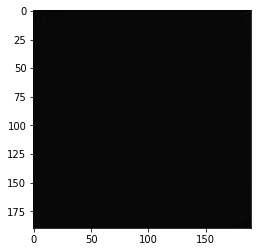

In [5]:
AU = np.matmul(A, img)
V = np.matmul(AU, A.T)
V_real = V.real
plt.imshow(V_real, cmap = 'gray')

## Inverse Fourier Transform

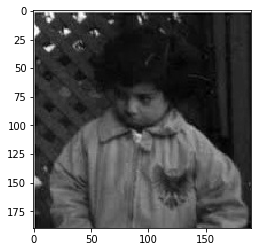

In [6]:
ATV = np.matmul(np.conj(A.T), V)
U = np.matmul(ATV, np.conj(A))
plt.imshow(U.real, cmap = 'gray')

# DCT

In [ ]:
img = cv2.imread('pout.tif', cv2.IMREAD_GRAYSCALE)
img = img[:190, :190]
plt.imshow(img, cmap = 'gray')
import math

In [ ]:
def generateDCTmatrix(N):
    arr = []
    n=N
    mat=np.zeros(shape=[n,n,3])

    for i in range(n):
        for j in range(n):
            mat[i][j]=1
    dct=np.zeros(shape=[n,n,3])
    pi=np.pi        
    for i in range(N):
        temp = []
        for j in range(N):
            if i==0:
                ci=1/np.sqrt(n)
            else:
                ci=np.sqrt(2)/np.sqrt(n)
            if j==0:
                cj=1/np.sqrt(n)
            else:
                cj=np.sqrt(2)/np.sqrt(n)
            sum1=0
            for k in range(n):
                for l in range(n):
                    dct1=mat[i][j]*np.cos((2*k+1)*i*pi/(2*n))*np.cos((2*l+1)*j*pi/(2*n))
                    sum1=sum1+dct1

            val=(ci*cj*abs(sum1))
            temp.append(val)
            
        arr.append(np.array(temp))
        
    return np.array(arr)

In [ ]:
A = generateDCTmatrix(190)

In [ ]:
A

In [ ]:
AU = np.matmul(A, img)
V = np.matmul(AU, A.T)


### 1a)Motion Blur

In [11]:
A = generateDFTmatrix(190)
AU = np.matmul(A, img)
F = np.matmul(AU, A.T)

In [12]:
def generateMotionBlur(N):
    arr = []
    a, b = 0.001, 0.1
    T = 1
    
    for i in range(N):
        temp = []
        for j in range(N):
            val = T * np.sin(np.pi * (i * a + j * b)) * np.exp(-1j * np.pi * (i * a + j * b)) / (np.pi * (i * a + j * b))
            temp.append(val)
            
        arr.append(np.array(temp))
        
    return np.array(arr)

In [13]:
H = generateMotionBlur(190)

C:\Users\STUDENT.SW3-C21\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


In [14]:
H[0, 0] = 0

In [15]:
out = F * H

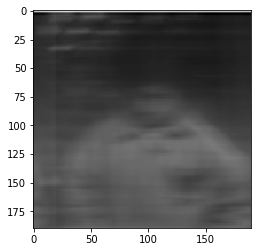

In [16]:

ATV = np.matmul(np.conj(A.T), out)
orig = np.matmul(ATV, np.conj(A))

plt.imshow(orig.real, cmap = 'gray')

In [17]:
out = F * H

In [18]:
H[0, 0] = 1

In [19]:
out = out / H

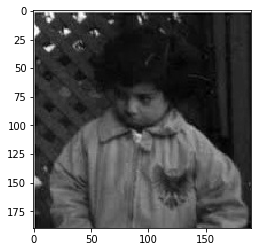

In [20]:

ATV = np.matmul(np.conj(A.T), out)
orig = np.matmul(ATV, np.conj(A))

plt.imshow(orig.real, cmap = 'gray')

# 1b) ATMOSPHERIC TURBULENCE


In [21]:
A = generateDFTmatrix(190)
AU = np.matmul(A, img)
F = np.matmul(AU, A.T)

In [22]:
def generateatmBlur(N):
    arr = []
    a, b = 0.001, 0.1
    
    
    for U in range(N):
        temp = []
        for V in range(N):
            val =  np.exp(-0.01*(U**2+V**2)**(5/6))
            temp.append(val)
            
        arr.append(np.array(temp))
        
    return np.array(arr)

In [23]:
H = generateatmBlur(190)
H[0, 0] = 0

In [24]:
out = F * H

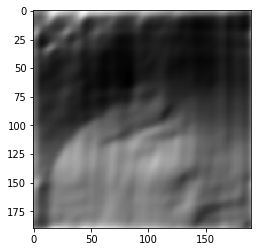

In [25]:
ATV = np.matmul(np.conj(A.T), out)
orig = np.matmul(ATV, np.conj(A))

plt.imshow(orig.real, cmap = 'gray')

# 2)WEINER DEBLURRING

In [26]:
H = generateMotionBlur(190)
H[0, 0] = 0

C:\Users\STUDENT.SW3-C21\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


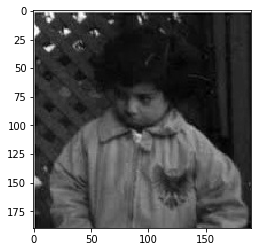

In [27]:
img = cv2.imread('pout.tif', cv2.IMREAD_GRAYSCALE)
img = img[:190, :190]
plt.imshow(img, cmap = 'gray')

In [28]:
A = generateDFTmatrix(190)
AU = np.matmul(A, img)
F = np.matmul(AU, A.T)*H

In [29]:
out=F

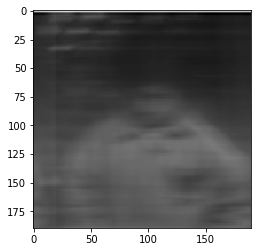

In [30]:

ATV = np.matmul(np.conj(A.T), out)
orig = np.matmul(ATV, np.conj(A))

plt.imshow(orig.real, cmap = 'gray')

In [31]:
out=np.conj(H)*F/(np.absolute(H)**2+0.00001)

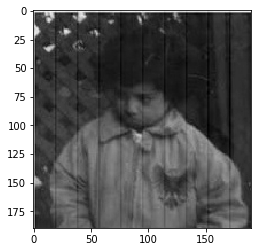

In [32]:

ATV = np.matmul(np.conj(A.T), out)
orig = np.matmul(ATV, np.conj(A))

plt.imshow(orig.real, cmap = 'gray')

# 3)KL-TRANSFORM

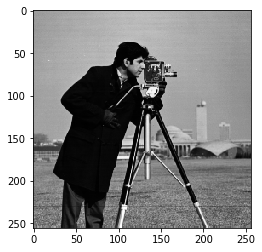

In [40]:
img = cv2.imread('cameraman.tif', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap = 'gray')

In [41]:
cov_mat=np.cov(img)

In [42]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
eigen = [(x, y) for x, y in zip(eigen_vals, eigen_vecs)]


In [43]:
def sorteigenvals(eigen):
    
    eigen = sorted(eigen, key = lambda x : x[0], reverse=True)
    vecs = []
    for val, vec in eigen:
        vecs.append(vec)
        
    return np.array(vecs)

In [44]:
transform = sorteigenvals(eigen)
transform = transform[:, :]
temp_img = img.copy()

In [45]:
m, n = temp_img.shape
mean = []

In [ ]:
for i in range(m):
    mean.append(temp_img[i].mean())
    temp_img[i] = temp_img[i] - mean[-1]

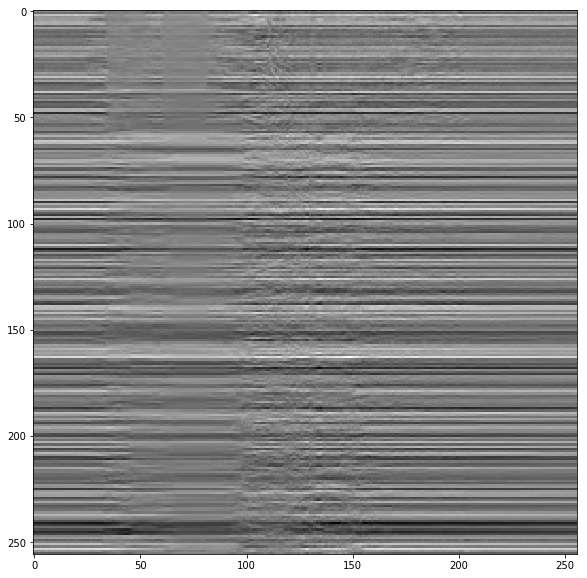

In [46]:
final_img = np.matmul(transform, temp_img)
plt.figure(figsize = (15, 10))
plt.imshow(final_img, cmap = 'gray')

In [47]:
temp_img.T
restore = np.matmul(np.linalg.inv(transform), final_img)

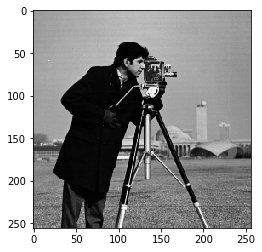

In [48]:
plt.imshow(restore, cmap = 'gray')

In [49]:
np.square(np.subtract(restore, img)).mean()

5.123684478627264e-25